In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import re

In [148]:
file= open('SMSSpamCollection.txt','w')

In [149]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1628-5EA5

 Directory of c:\Users\tanma\.vscode\upflaire\DATA-SCIENCE-WITH-GENERATIVE-AI-AND-PROMPT-ENGINEERING\Email classification

07-08-2024  10:52    <DIR>          .
07-08-2024  11:26    <DIR>          ..
07-08-2024  10:47         2,584,000 assign.txt
05-08-2024  10:19    <DIR>          data
06-08-2024  10:46           103,195 datascience.ipynb
07-08-2024  16:06               215 demo.txt
07-08-2024  16:11         1,723,968 email.ipynb
07-08-2024  10:52    <DIR>          models
07-08-2024  16:12                 0 SMSSpamCollection.txt
               5 File(s)      4,411,378 bytes
               4 Dir(s)  362,067,562,496 bytes free


In [150]:
message = """
 hi we are from upflairs,and thank you for joining our data science and machine program>

 write mode
"""

file=open('demo.txt','w')
file.write(message)
file.close() 
# write mode delete the past information and add current information


In [151]:
file=open('demo.txt','r')
data=file.read()
print(data)


 hi we are from upflairs,and thank you for joining our data science and machine program>

 write mode



In [152]:
message = """
\nhi we are from upflairs,and thank you for joining our data science and machine program>

append mode
"""

file=open('demo.txt','a')
file.write(message)
file.close() 
# while this append mode will not delete the last data and add new data into the file
# there is a problem in append that it wil add data or meassage just after where it left so we
# need to add a new line to make it look good and clean

In [153]:
file=open('demo.txt','r')
data=file.read()
file.close()
print(data)


 hi we are from upflairs,and thank you for joining our data science and machine program>

 write mode


hi we are from upflairs,and thank you for joining our data science and machine program>

append mode



In [154]:
# with open('demo.txt','r') as file :
#     data =file.read()
#     print(data)

    # _______________these both are same _____________
    # 

file=open('demo.txt','r')
data=file.read()
file.close()
print(data)


 hi we are from upflairs,and thank you for joining our data science and machine program>

 write mode


hi we are from upflairs,and thank you for joining our data science and machine program>

append mode



In [155]:
file=open('data/SMSSpamCollection.txt','r')
data=file.read()
file.close()
print(data)

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam

In [156]:
# for i in range(1000):


#     message = """
#         \nhi we are from upflairs,and thank you for joining our data science and machine program>

#         append mode
#             """

#     file=open('assign.txt','a')
#     file.write(message)
    

In [157]:
# data=file.read('')
# print(data)

In [158]:
file_path="data/SMSSpamCollection.txt"

file =open(file_path)
data =file.read()
print(data)
file.close()

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam

In [159]:
data.split('\n')
print("total no.of emails:",len(data.split('\n')))

total no.of emails: 5575


In [160]:
data.split('\n')[1]

'ham\tOk lar... Joking wif u oni...'

In [161]:
x=[]
y=[]


for line in data.split('\n'):
    if len(line.split('\t'))==2:
        x.append(line.split('\t')[1])
        y.append(line.split('\t')[0])


In [162]:
len(x),len(y)

(5574, 5574)

In [163]:
x[1] #email message

'Ok lar... Joking wif u oni...'

In [164]:
y[1] #label

'ham'

# create dataframe

In [165]:
email_data=pd.DataFrame({"email_message":x,"labels":y})
email_data.head()

,email_message,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [166]:
df2=pd.read_table(file_path)
df2.columns=['labels','email_message']
df2

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [167]:
df2.head()

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [168]:
print("total no of emails: ",df2.shape[0])

total no of emails:  5571


In [169]:
single_email=df2['email_message'][1]
single_email

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [170]:
type(single_email)

str

In [171]:
single_email.lower()

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"

In [172]:
import re # re-->regular expression

In [173]:
re.findall("2",single_email)

['2', '2', '2', '2', '2']

In [174]:
re.sub("[^a-zA-Z ]","",single_email)

'Free entry in  a wkly comp to win FA Cup final tkts st May  Text FA to  to receive entry questionstd txt rateTCs apply overs'

In [175]:
for i in range(len(df2)):

    single_email=df2['email_message'][i]
    single_email=single_email.lower()

    print('\n',i,re.sub("[^a-zA-Z ]","",single_email))




 0 ok lar joking wif u oni

 1 free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs

 2 u dun say so early hor u c already then say

 3 nah i dont think he goes to usf he lives around here though

 4 freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send  to rcv

 5 even my brother is not like to speak with me they treat me like aids patent

 6 as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune

 7 winner as a valued network customer you have been selected to receivea  prize reward to claim call  claim code kl valid  hours only

 8 had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 

 9 im gonna be home soon and i dont want to talk about this stuff anymore

In [176]:
df2['labels'].value_counts()

labels
ham     4824
spam     747
Name: count, dtype: int64

In [177]:
ham=df2[df2['labels']=="ham"]
spam=df2[df2['labels']=='spam']

In [178]:
spam.shape

(747, 2)

In [179]:
ham.shape

(4824, 2)

In [180]:
ham= ham.sample(1000)

In [181]:
ham

,labels,email_message
3377,ham,Yup. Wun believe wat? U really neva c e msg i ...
2148,ham,I will once i get home
4442,ham,Dear i am not denying your words please
3324,ham,I don wake since. I checked that stuff and saw...
2113,ham,"Yeah, don't go to bed, I'll be back before mid..."
...,...,...
1326,ham,"Sorry, was in the bathroom, sup"
3157,ham,Havent shopping now lor i juz arrive only
144,ham,Yes see ya not on the dot
2072,ham,That is wondarfull song


In [182]:
# type(spam)
# spam=np.array(spam)
# ham=np.array(ham)

In [183]:
# spam= spam.sample(1000,replace=True)

In [184]:
spam.shape,ham.shape
type(spam)
type(ham)

pandas.core.frame.DataFrame

In [185]:
import pandas as pd

# spam =   pd.DataFrame(spam)          #pd.Series(spam) 
# ham = pd.DataFrame(ham)               # pd.Series(ham) 


new_df= pd.concat([spam,ham] )

In [186]:
new_df.shape

(1747, 2)

In [187]:
new_df.duplicated().sum()

np.int64(117)

In [188]:
print(new_df.columns)


Index(['labels', 'email_message'], dtype='object')


In [189]:
spam['labels'] = 'spam'
ham['labels'] = 'ham'


C:\Users\tanma\AppData\Local\Temp\ipykernel_1760\2970743986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['labels'] = 'spam'


In [190]:
new_df['labels']=new_df['labels'].map({'spam':1,'ham':0})

In [191]:
x=new_df['email_message']
y=new_df['labels']

In [192]:
x= x.values

In [193]:
type(x)

numpy.ndarray

In [194]:
x.shape,len(y)

((1747,), 1747)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_obj =CountVectorizer(max_features=1500,stop_words='english')

X=bow_obj.fit_transform(x)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14318 stored elements and shape (1747, 1500)>

In [196]:
X_transformed=X.toarray()

In [197]:
X_transformed[0][1000:1200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [198]:
y.shape,X_transformed.shape

((1747,), (1747, 1500))

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.15,random_state=42)

In [200]:
# # model training algorithm train
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
mnb=MultinomialNB()
bnb=BernoulliNB()


mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
print("Algorithms trained on the data!")
print("multinomial naive bayes")
print("training score:",mnb.score(x_train,y_train))
print("testing score:",mnb.score(x_test,y_test))
print()

print("bernoli naive bayes!")
print("training score:",bnb.score(x_train,y_train))
print("testing score:",bnb.score(x_test,y_test))

Algorithms trained on the data!
multinomial naive bayes
training score: 0.9716981132075472
testing score: 0.9695817490494296

bernoli naive bayes!
training score: 0.9622641509433962
testing score: 0.9657794676806084


In [201]:
### prediction 
prediction=mnb.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [202]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [203]:
evaluation_df=pd.DataFrame({"actual_class":y_test,"predicted_class":prediction})
evaluation_df.head(40)

,actual_class,predicted_class
4023,0,0
561,0,0
4657,1,1
762,1,1
2373,1,1
3792,0,0
4974,0,0
751,1,1
869,1,1
4297,1,1


In [204]:
evaluation_df['actual_class']=evaluation_df['actual_class'].map({1:'spam',0:'ham'})
evaluation_df['predicted_class']=evaluation_df['predicted_class'].map({1:'spam',0:'ham'})

In [205]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report


In [212]:
print("confusion matrix:",confusion_matrix(evaluation_df['actual_class'],evaluation_df['predicted_class']))

confusion matrix: [[136   5]
 [  3 119]]


In [213]:

matrix = confusion_matrix(evaluation_df['actual_class'],evaluation_df['predicted_class'])
matrix 

array([[136,   5],
       [  3, 119]])

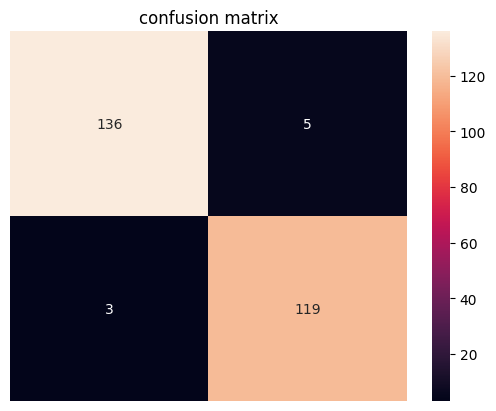

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix,annot=True,fmt='d')
plt.title('confusion matrix')
plt.axis('off')
plt.show()

In [215]:
print(classification_report(evaluation_df['actual_class'],evaluation_df['predicted_class']))

              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       141
        spam       0.96      0.98      0.97       122

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263



In [216]:
## model ssave
import joblib,os
os.makedirs('models',exist_ok=True)
joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernolinaivebayes.lb')
joblib.dump(bow_obj,'./models/countvectorizer.lb')
print('your object is saved')


your object is saved


In [ ]:
# 1.DATA COLLECTION ,GATHERING
# 2.DATA MANIPULATION
# 3 DATA WRANGLING
# 4.DATA CLEANING
# 5.DATA PRE PROCESSING
# 6.DATA PREPARATION
# 7.DATA VISUALZATION
# 8.DATA NORMALIZATION OR SCALING
# 9.FEATURE ENGINEERING
# 10.FEATURE EXTRACTION
# 11.DATA TRANFORMATION
# FEATURE SELECTION

# ____________MAKE NOTES IN JUPYTER NOTEBOOK ABOUT ALL OF THESE ________
# ____________MAKE NOTES IN JUPYTER NOTEBOOK ABOUT ALL OF THESE ________

##### 1.DATA COLLECTION ,GATHERING
##### 2.DATA MANIPULATION
##### 3 DATA WRANGLING
##### 4.DATA CLEANING
##### 5.DATA PRE PROCESSING
##### 7.DATA VISUALZATION
##### 6.DATA PREPARATION
##### 8.DATA NORMALIZATION OR SCALING
##### 9.FEATURE ENGINEERING
##### 10.FEATURE EXTRACTION
##### 11.DATA TRANFORMATION
##### FEATURE SELECTION

##### ____________MAKE NOTES IN JUPYTER NOTEBOOK ABOUT ALL OF THESE ________
##### ____________MAKE NOTES IN JUPYTER NOTEBOOK ABOUT ALL OF THESE ________

In [ ]:
#  WHAT IS MACHINE LEARNING LIFE CYCLE 
# LAPTOP PRICE PREDICTION 
# ALL THESE ARE THE HOMEWORKS